In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# Load dataset
df = pd.read_csv('Smart watch prices.csv')

# Display top 5 rows
df.head()

,Brand,Model,Operating System,Connectivity,Display Type,Display Size (inches),Resolution,Water Resistance (meters),Battery Life (days),Heart Rate Monitor,GPS,NFC,Price (USD)
0,Apple,Watch Series 7,watchOS,"Bluetooth, Wi-Fi, Cellular",Retina,1.90,396 x 484,50,18,Yes,Yes,Yes,$399
1,Samsung,Galaxy Watch 4,Wear OS,"Bluetooth, Wi-Fi, Cellular",AMOLED,1.40,450 x 450,50,40,Yes,Yes,Yes,$249
2,Garmin,Venu 2,Garmin OS,"Bluetooth, Wi-Fi",AMOLED,1.30,416 x 416,50,11,Yes,Yes,No,$399
3,Fitbit,Versa 3,Fitbit OS,"Bluetooth, Wi-Fi",AMOLED,1.58,336 x 336,50,6,Yes,Yes,Yes,$229
4,Fossil,Gen 6,Wear OS,"Bluetooth, Wi-Fi",AMOLED,1.28,416 x 416,30,24,Yes,Yes,Yes,$299


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 379 entries, 0 to 378
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Brand                      378 non-null    object 
 1   Model                      378 non-null    object 
 2   Operating System           376 non-null    object 
 3   Connectivity               378 non-null    object 
 4   Display Type               377 non-null    object 
 5   Display Size (inches)      376 non-null    float64
 6   Resolution                 375 non-null    object 
 7   Water Resistance (meters)  378 non-null    object 
 8   Battery Life (days)        378 non-null    object 
 9   Heart Rate Monitor         378 non-null    object 
 10  GPS                        378 non-null    object 
 11  NFC                        378 non-null    object 
 12  Price (USD)                378 non-null    object 
dtypes: float64(1), object(12)
memory usage: 38.6+ KB


In [ ]:

# Replace spaces and brackets with underscores in column names
df.columns = df.columns.str.replace(' ', '_').str.replace(r'[()]', '', regex=True)
df.columns = df.columns.str.lower()
# Display the modified column names
print(df.columns)

Index(['brand', 'model', 'operating_system', 'connectivity', 'display_type',
       'display_size_inches', 'resolution', 'water_resistance_meters',
       'battery_life_days', 'heart_rate_monitor', 'gps', 'nfc', 'price_usd'],
      dtype='object')


In [ ]:
heart_rate_counts = df['heart_rate_monitor'].value_counts()

# Display frequency counts
print(heart_rate_counts)

Yes    378
Name: heart_rate_monitor, dtype: int64


In [ ]:
df.drop('heart_rate_monitor', axis=1, inplace=True)

# Display the DataFrame after dropping the column
df.head()

,brand,model,operating_system,connectivity,display_type,display_size_inches,resolution,water_resistance_meters,battery_life_days,gps,nfc,price_usd
0,Apple,Watch Series 7,watchOS,"Bluetooth, Wi-Fi, Cellular",Retina,1.90,396 x 484,50,18,Yes,Yes,$399
1,Samsung,Galaxy Watch 4,Wear OS,"Bluetooth, Wi-Fi, Cellular",AMOLED,1.40,450 x 450,50,40,Yes,Yes,$249
2,Garmin,Venu 2,Garmin OS,"Bluetooth, Wi-Fi",AMOLED,1.30,416 x 416,50,11,Yes,No,$399
3,Fitbit,Versa 3,Fitbit OS,"Bluetooth, Wi-Fi",AMOLED,1.58,336 x 336,50,6,Yes,Yes,$229
4,Fossil,Gen 6,Wear OS,"Bluetooth, Wi-Fi",AMOLED,1.28,416 x 416,30,24,Yes,Yes,$299


In [ ]:
df.isnull().sum()

brand                      1
model                      1
operating_system           3
connectivity               1
display_type               2
display_size_inches        3
resolution                 4
water_resistance_meters    1
battery_life_days          1
gps                        1
nfc                        1
price_usd                  1
dtype: int64

In [ ]:
df = df.dropna()

In [ ]:
df.isnull().sum()

brand                      0
model                      0
operating_system           0
connectivity               0
display_type               0
display_size_inches        0
resolution                 0
water_resistance_meters    0
battery_life_days          0
gps                        0
nfc                        0
price_usd                  0
dtype: int64

In [ ]:
df[['res_width', 'res_height']] = df['resolution'].str.strip().str.split('x', expand=True)
df['res_width']=df['res_width'].astype('float')
df['res_height']=df['res_height'].astype('float')

# creating resolution column
df['resolution'] = df['res_width']*df['res_height']
df = df.drop(['res_width', 'res_height'], axis=1)


In [ ]:
df.head()

,brand,model,operating_system,connectivity,display_type,display_size_inches,resolution,water_resistance_meters,battery_life_days,gps,nfc,price_usd
0,Apple,Watch Series 7,watchOS,"Bluetooth, Wi-Fi, Cellular",Retina,1.90,191664.0,50,18,Yes,Yes,$399
1,Samsung,Galaxy Watch 4,Wear OS,"Bluetooth, Wi-Fi, Cellular",AMOLED,1.40,202500.0,50,40,Yes,Yes,$249
2,Garmin,Venu 2,Garmin OS,"Bluetooth, Wi-Fi",AMOLED,1.30,173056.0,50,11,Yes,No,$399
3,Fitbit,Versa 3,Fitbit OS,"Bluetooth, Wi-Fi",AMOLED,1.58,112896.0,50,6,Yes,Yes,$229
4,Fossil,Gen 6,Wear OS,"Bluetooth, Wi-Fi",AMOLED,1.28,173056.0,30,24,Yes,Yes,$299


In [ ]:
df['water_resistance_meters'].value_counts()

50               274
30                62
100               26
200                8
1.5                2
Not specified      1
10                 1
Name: water_resistance_meters, dtype: int64

In [ ]:
df['water_resistance_meters'] = df['water_resistance_meters'].replace('Not specified', np.nan)
df.dropna(subset=['water_resistance_meters'], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 373 entries, 0 to 378
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   brand                    373 non-null    object 
 1   model                    373 non-null    object 
 2   operating_system         373 non-null    object 
 3   connectivity             373 non-null    object 
 4   display_type             373 non-null    object 
 5   display_size_inches      373 non-null    float64
 6   resolution               373 non-null    float64
 7   water_resistance_meters  373 non-null    object 
 8   battery_life_days        373 non-null    object 
 9   gps                      373 non-null    object 
 10  nfc                      373 non-null    object 
 11  price_usd                373 non-null    object 
dtypes: float64(2), object(10)
memory usage: 37.9+ KB


In [ ]:
df['price_usd'] = df['price_usd'].str[1:]
df['price_usd'] = df['price_usd'].str.replace(',', '').str.strip()

In [ ]:
print(df['price_usd'].value_counts())

299     57
199     49
249     30
399     26
179     25
295     22
279     21
499     15
599     13
139     12
349     11
329      9
229      8
159      7
149      5
129      5
219      4
799      4
699      4
99       4
549      4
69       3
569      3
209      3
189      2
375      2
195      2
275      2
119      2
849      1
649      1
325      1
259      1
1170     1
1200     1
1800     1
1230     1
150      1
990      1
1650     1
1500     1
120      1
255      1
269      1
479      1
59       1
49       1
350      1
Name: price_usd, dtype: int64


In [ ]:
Battery_Life_days_counts = df['battery_life_days'].value_counts()
# Display frequency counts
print(Battery_Life_days_counts)

14           81
2            54
3            36
24           29
6            23
1            21
5            18
18           15
25           12
30           10
16           10
1.5          10
4             8
7             8
15            6
45            4
9             4
70            4
10            4
Unlimited     3
12            2
20            2
40            2
72            2
48            1
56            1
60            1
11            1
8             1
Name: battery_life_days, dtype: int64


In [ ]:
df['battery_life_days'] = df['battery_life_days'].replace({'Unlimited': 100, '48 hours':48})

In [ ]:
num_cols = ['water_resistance_meters',
            'battery_life_days',
            'price_usd',
            'display_size_inches',
            'resolution']
df[num_cols] = df[num_cols].astype(float)

In [ ]:
# Convert values that are more than 10 to days
print(df[df['battery_life_days'] >= 10].head())
df['battery_life_days'] = np.where(df['battery_life_days'] >= 10 , df['battery_life_days'] / 24, df['battery_life_days'])
df['battery_life_days'] = round(df['battery_life_days'],1)

     brand           model operating_system                connectivity  \
0    Apple  Watch Series 7          watchOS  Bluetooth, Wi-Fi, Cellular   
1  Samsung  Galaxy Watch 4          Wear OS  Bluetooth, Wi-Fi, Cellular   
2   Garmin          Venu 2        Garmin OS            Bluetooth, Wi-Fi   
4   Fossil           Gen 6          Wear OS            Bluetooth, Wi-Fi   
5   Huawei     Watch 3 Pro        HarmonyOS  Bluetooth, Wi-Fi, Cellular   

  display_type  display_size_inches  resolution  water_resistance_meters  \
0       Retina                 1.90    191664.0                     50.0   
1       AMOLED                 1.40    202500.0                     50.0   
2       AMOLED                 1.30    173056.0                     50.0   
4       AMOLED                 1.28    173056.0                     30.0   
5       AMOLED                 1.43    217156.0                     50.0   

   battery_life_days  gps  nfc  price_usd  
0               18.0  Yes  Yes      399.0  
1   

In [ ]:
df.describe()

,display_size_inches,resolution,water_resistance_meters,battery_life_days,price_usd
count,373.000000,373.000000,373.000000,373.000000,373.000000
mean,1.356139,139457.683646,53.010724,2.115013,314.201072
std,0.171283,54929.424559,27.076329,1.901595,202.995974
min,0.900000,4536.000000,1.500000,0.400000,49.000000
25%,1.200000,107584.000000,50.000000,0.600000,199.000000
50%,1.390000,152100.000000,50.000000,1.200000,279.000000
75%,1.400000,206116.000000,50.000000,3.000000,329.000000
max,2.100000,230400.000000,200.000000,9.000000,1800.000000


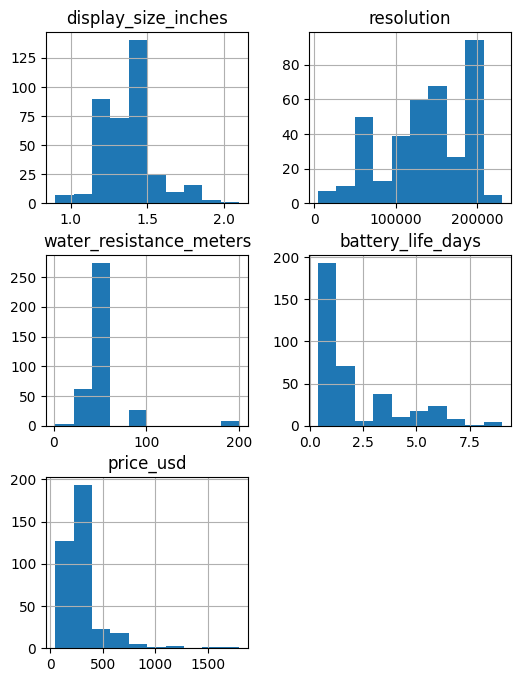

In [ ]:
# Histograms of numerical variables (ignore price for now)

ax = df.hist(figsize=[6,8])
plt.show()

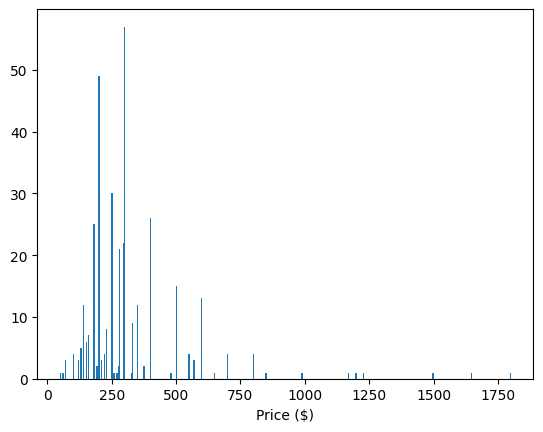

In [ ]:
bin_size = 5
plt.hist(df['price_usd'], bins=int(np.ceil((df['price_usd'].max() - df['price_usd'].min()) / bin_size)))
plt.xlabel('Price ($)')
plt.show()

In [ ]:
# create price classes based on visual glance to the distribution
conditions = [
    (df['price_usd'] >= 300),
    (df['price_usd'] < 300)
    ]

# create a list of the values we want to assign for each condition
values = ['High-End', 'Low-End']

# create a new column and use np.select to assign values to it using our lists as arguments
df['brand_tier'] = np.select(conditions, values)
df['brand_tier'] = df['brand_tier'].astype('category')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 373 entries, 0 to 378
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   brand                    373 non-null    object  
 1   model                    373 non-null    object  
 2   operating_system         373 non-null    object  
 3   connectivity             373 non-null    object  
 4   display_type             373 non-null    object  
 5   display_size_inches      373 non-null    float64 
 6   resolution               373 non-null    float64 
 7   water_resistance_meters  373 non-null    float64 
 8   battery_life_days        373 non-null    float64 
 9   gps                      373 non-null    object  
 10  nfc                      373 non-null    object  
 11  price_usd                373 non-null    float64 
 12  brand_tier               373 non-null    category
dtypes: category(1), float64(5), object(7)
memory usage: 38.4+ KB


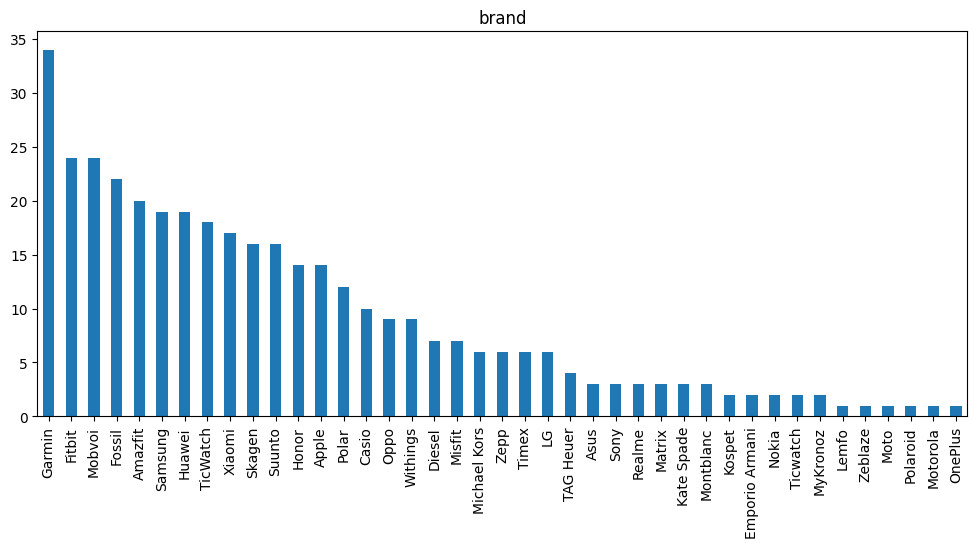

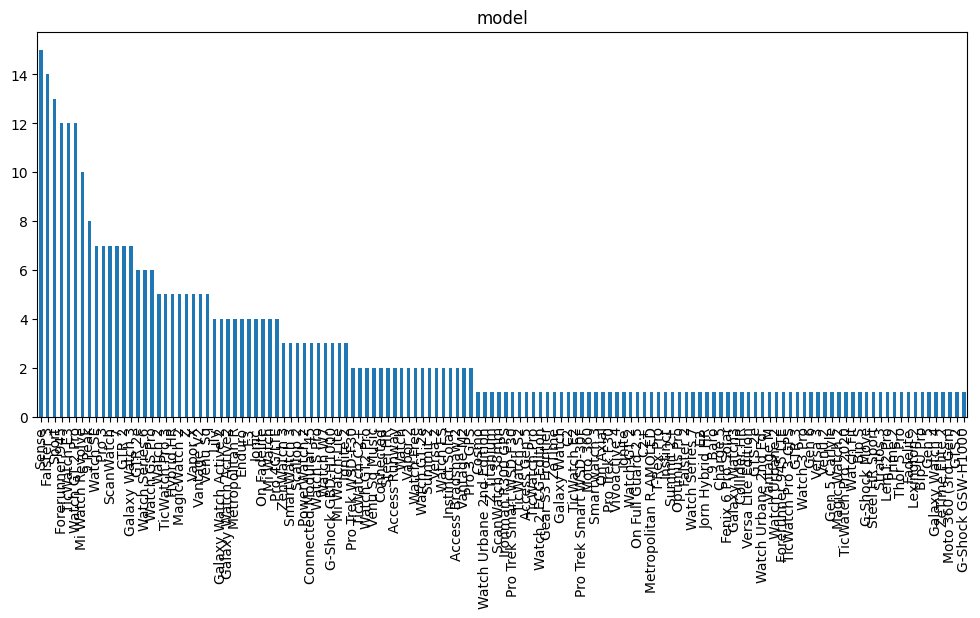

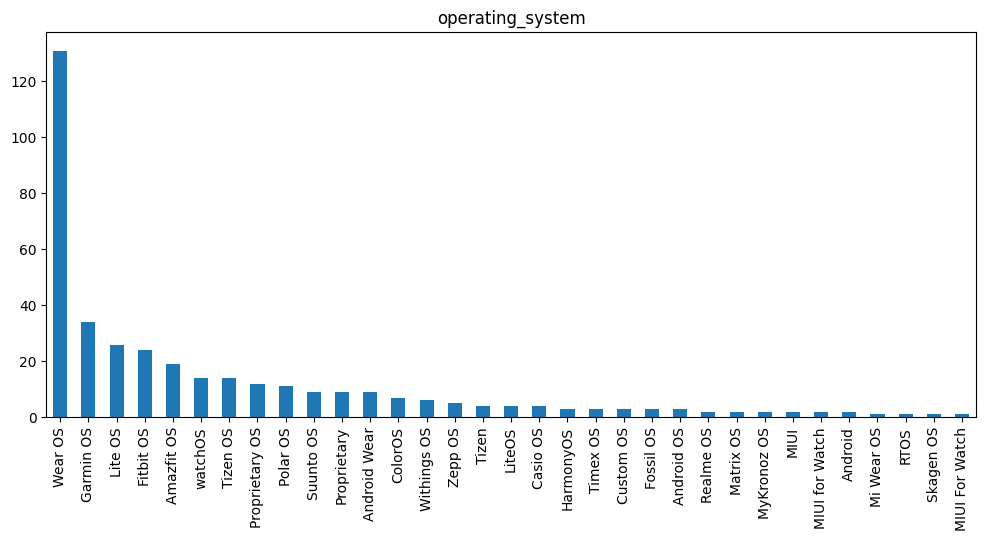

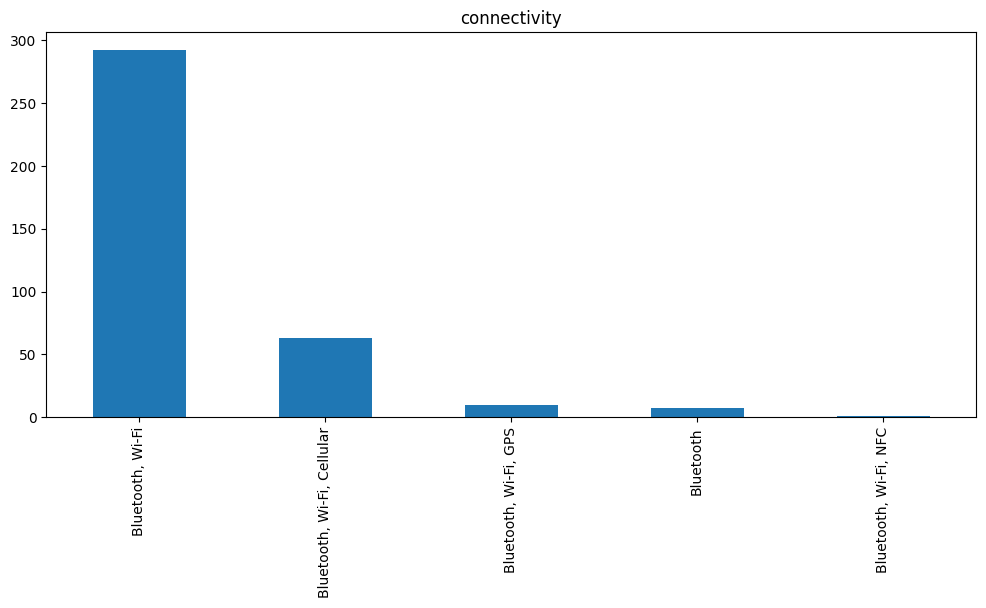

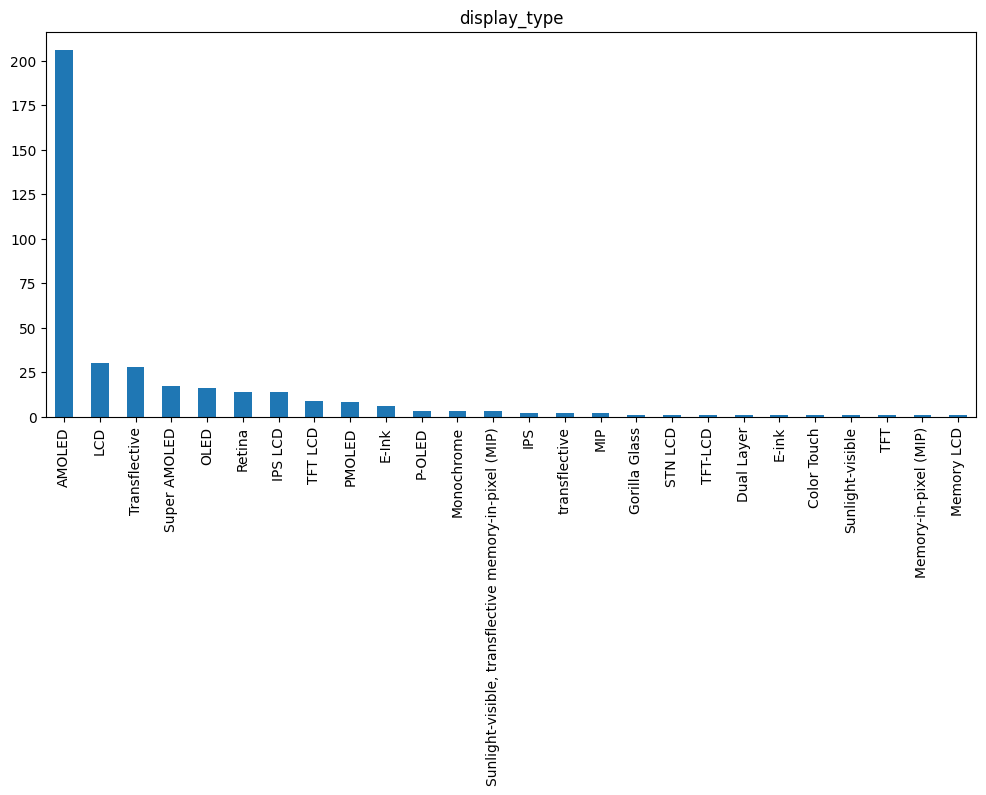

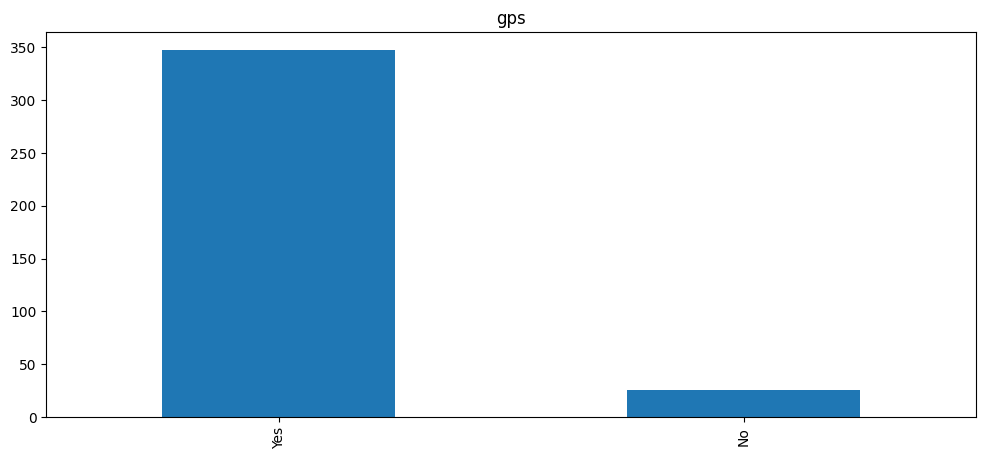

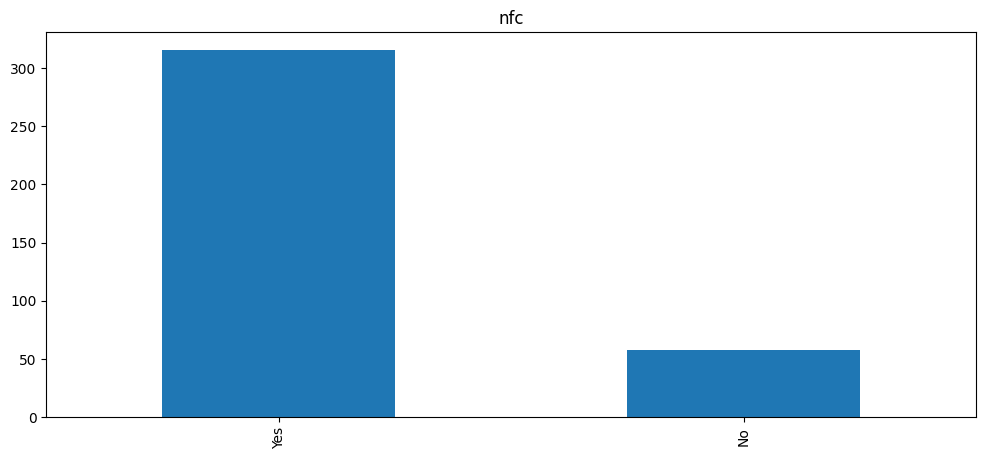

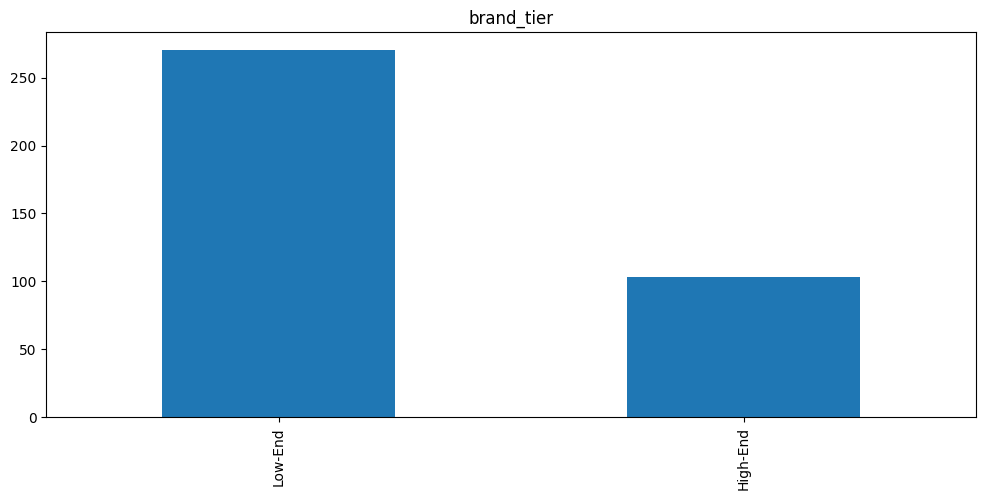

In [ ]:
# extracting categorical columns
cat_cols = list(df.loc[:, ~df.columns.isin(num_cols)].columns)
cat_cols

for col in df[cat_cols]:
    df[col].value_counts().plot(kind='bar', figsize=(12, 5), title=col)
    plt.show()

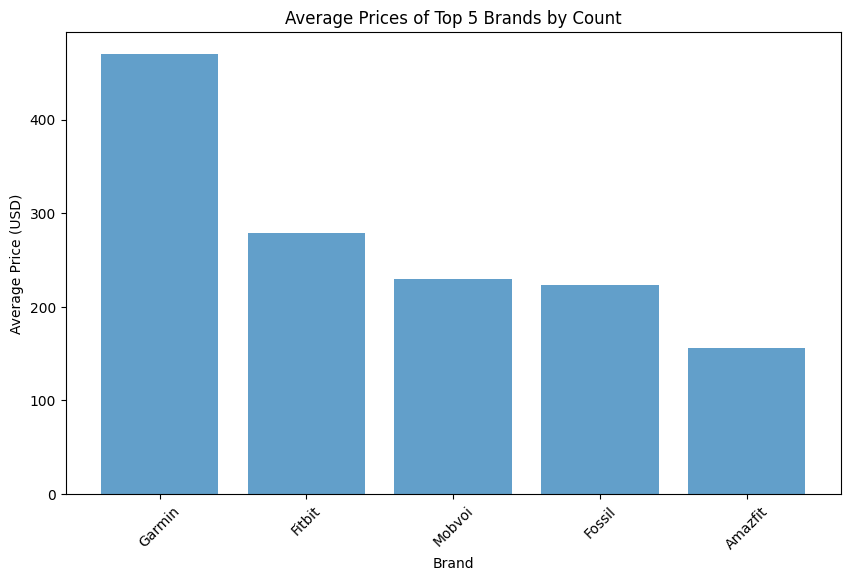

In [ ]:
top_brands = df['brand'].value_counts().head(5).index.tolist()
brand_avg_price = df.groupby('brand')['price_usd'].mean().loc[top_brands]

plt.figure(figsize=(10, 6))
plt.bar(brand_avg_price.index, brand_avg_price.values, alpha=0.7)
plt.xlabel('Brand')
plt.ylabel('Average Price (USD)')
plt.title('Average Prices of Top 5 Brands by Count')
plt.xticks(rotation=45)
plt.show()

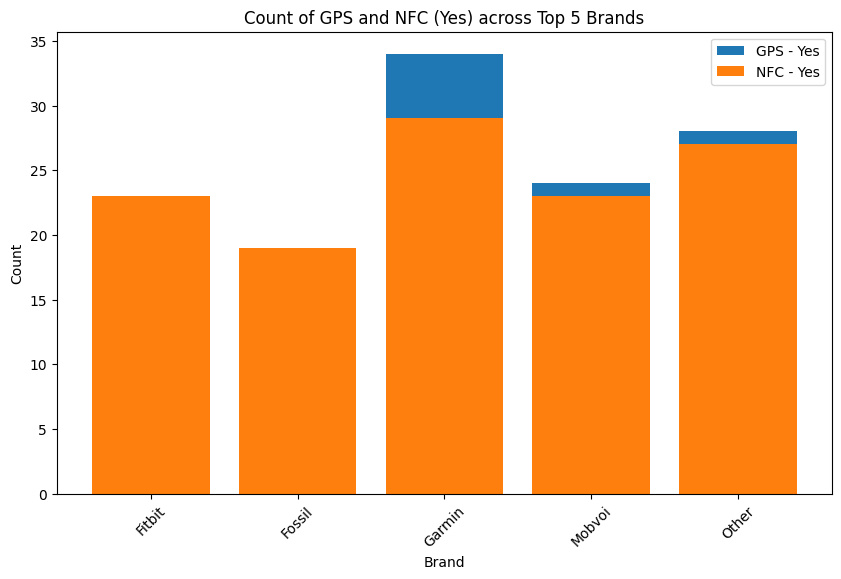

In [ ]:
import matplotlib.pyplot as plt

# Get the top 5 brands by counts
top_brands = df['brand'].value_counts().head(5).index

# Filter data for the top 5 brands
top_brands_data = df[df['brand'].isin(top_brands)]

# Counting the occurrences of 'Yes' for GPS and NFC features across the top 5 brands
gps_counts = top_brands_data[top_brands_data['gps'] == 'Yes'].groupby('brand')['gps'].count()
nfc_counts = top_brands_data[top_brands_data['nfc'] == 'Yes'].groupby('brand')['nfc'].count()

# Plotting a bar plot for GPS 'Yes' counts across different brands
plt.figure(figsize=(10, 6))
plt.bar(gps_counts.index, gps_counts.values, label='GPS - Yes')
plt.bar(nfc_counts.index, nfc_counts.values, label='NFC - Yes')
plt.xlabel('Brand')
plt.ylabel('Count')
plt.title('Count of GPS and NFC (Yes) across Top 5 Brands')
plt.legend()
plt.xticks(rotation=45)
plt.show()


<ipython-input-1331-493ea3c79f38>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


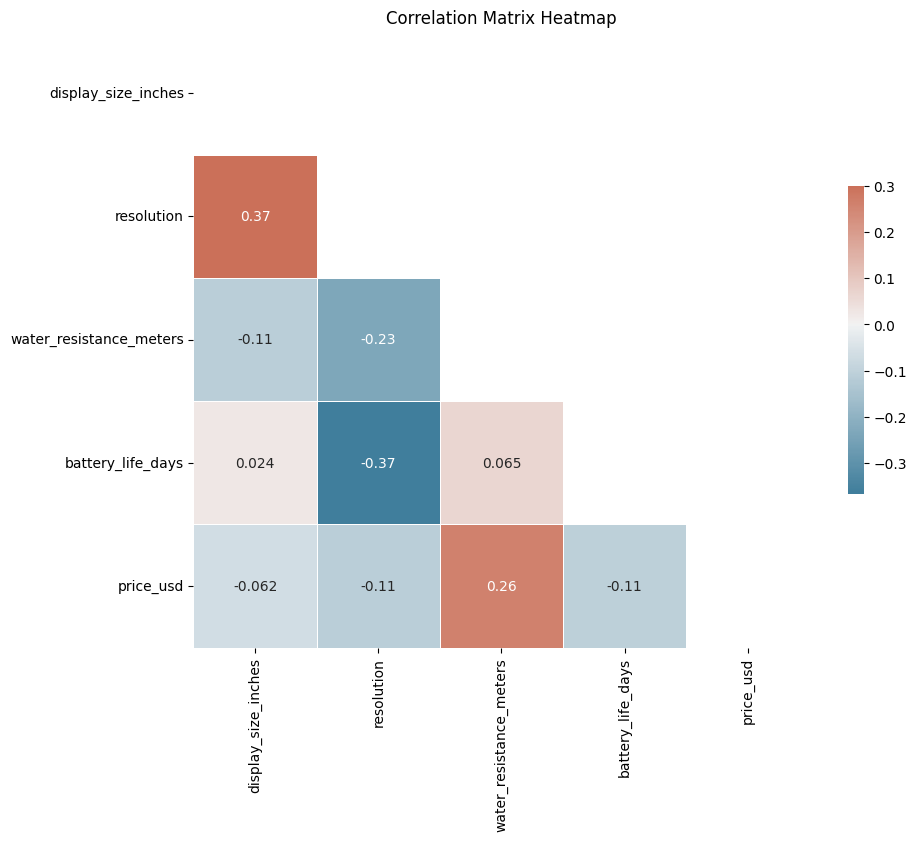

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
corr_matrix = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_matrix, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, annot=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.title('Correlation Matrix Heatmap')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

columns_to_drop = ['price_usd', 'brand_tier', 'display_size_inches']
X = df.drop(columns=columns_to_drop, axis=1)  # Features (all columns except 'Price (USD)')
y = df['brand_tier']  # Target variable

# Convert categorical variables to dummies using one-hot encoding
X = pd.get_dummies(X)

# Split the data into training and test sets (adjust test_size and random_state as needed)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

In [ ]:
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)  # Increase max_iter if needed for convergence
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

Accuracy: 0.7857142857142857
Confusion Matrix:
[[13 14]
 [10 75]]
Classification Report:
              precision    recall  f1-score   support

    High-End       0.57      0.48      0.52        27
     Low-End       0.84      0.88      0.86        85

    accuracy                           0.79       112
   macro avg       0.70      0.68      0.69       112
weighted avg       0.78      0.79      0.78       112



In [ ]:
######################################################################################

In [ ]:
# Get frequency counts of the 'Brand' variable
brand_counts = df['brand'].value_counts()

# Get the top 19 brands
top_25_brands = brand_counts.head(25).index.tolist()

# Create a new category 'Other' for the rest of the brands
df['brand'] = df['brand'].apply(lambda x: x if x in top_25_brands else 'Other')

# Show frequency counts for the new 'Brand_Category'
brand_category_counts = df['brand'].value_counts()
print(brand_category_counts)

Garmin          34
Other           31
Fitbit          24
Mobvoi          24
Fossil          22
Amazfit         20
Samsung         19
Huawei          19
TicWatch        18
Xiaomi          17
Skagen          16
Suunto          16
Honor           14
Apple           14
Polar           12
Casio           10
Withings         9
Oppo             9
Misfit           7
Diesel           7
LG               6
Zepp             6
Timex            6
Michael Kors     6
TAG Heuer        4
Asus             3
Name: brand, dtype: int64


In [ ]:
# Get frequency counts of the 'operating_system' variable
operating_system_counts = df['operating_system'].value_counts()

# Get the top 9 operating_system
top_9_operating_system = operating_system_counts.head(9).index.tolist()

# Create a new category 'Other' for the rest of the OS
df['operating_system'] = df['operating_system'].apply(lambda x: x if x in top_9_operating_system else 'Other')

# Show frequency counts for the new 'connectivity'
os_category_counts = df['operating_system'].value_counts()
print(os_category_counts)

Wear OS           131
Other              88
Garmin OS          34
Lite OS            26
Fitbit OS          24
Amazfit OS         19
watchOS            14
Tizen OS           14
Proprietary OS     12
Polar OS           11
Name: operating_system, dtype: int64


In [ ]:
# Get frequency counts of the 'Display_Type' variable
display_counts = df['display_type'].value_counts()

# Get the top 3 display types
top_9_displays = display_counts.head(9).index.tolist()

# Create a new category 'Other' for the rest
df['display_type'] = df['display_type'].apply(lambda x: x if x in top_9_displays else 'Other')

# Show frequency counts for the new 'connectivity'
display_type_category_counts = df['display_type'].value_counts()
print(display_type_category_counts)

AMOLED           206
Other             31
LCD               30
Transflective     28
Super AMOLED      17
OLED              16
Retina            14
IPS LCD           14
TFT LCD            9
PMOLED             8
Name: display_type, dtype: int64


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Define the model formula
model_formula = 'price_usd ~ resolution + water_resistance_meters + battery_life_days + gps + nfc + C(display_type) + C(brand) + C(operating_system)'

# Splitting the data into train and test sets
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)  # You can adjust the test_size and random_state

# Fitting the linear regression model on the training data
train_model = sm.OLS.from_formula(model_formula, data=train_df)
train_result = train_model.fit()

# Making predictions on the test data
test_predictions = train_result.predict(test_df)

# Printing the summary of the regression model
print(train_result.summary())

actual_values = test_df['price_usd']  # Replace 'price_usd' with your actual target column name

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(actual_values, test_predictions)
print("Mean Squared Error", mse)

# Calculate R-squared (R2)
r_squared = r2_score(actual_values, test_predictions)
print("R-Squared", r_squared)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print("Root Mean Squared Error", rmse)


                            OLS Regression Results                            
Dep. Variable:              price_usd   R-squared:                       0.733
Model:                            OLS   Adj. R-squared:                  0.686
Method:                 Least Squares   F-statistic:                     15.76
Date:                Mon, 11 Dec 2023   Prob (F-statistic):           7.99e-51
Time:                        07:51:20   Log-Likelihood:                -1808.1
No. Observations:                 298   AIC:                             3706.
Df Residuals:                     253   BIC:                             3872.
Df Model:                          44                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

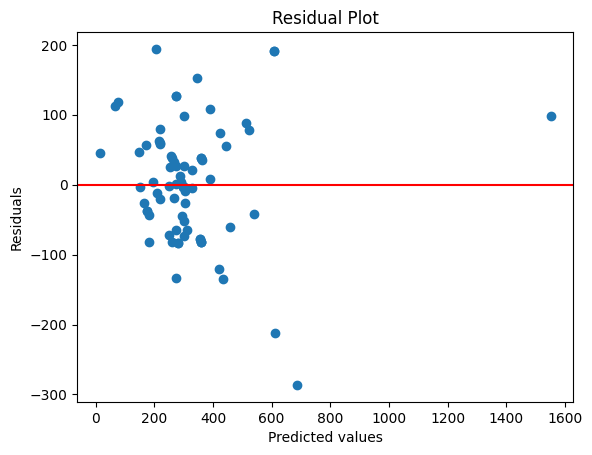

In [ ]:

residuals = actual_values - test_predictions  # Compute residuals

# Plot residuals against predicted values
plt.scatter(test_predictions, residuals)
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.axhline(y=0, color='r', linestyle='-')  # Add a horizontal line at y=0
plt.show()